In [43]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
import scipy.signal as signal
import numpy as np
import wave
import sys

from IPython.display import Audio, display, HTML
from ipywidgets import interact

from scipy.io import wavfile
import requests

%matplotlib inline
matplotlib.rcParams['animation.writer'] = 'avconv'
matplotlib.rcParams['figure.figsize'] = "8,3"

In [44]:
def presentAliasingAudio(original, rate, factor):
    down_aliased = original[::factor] # dumb downsampling, no anti-aliasing
    b = signal.firwin(155, 1.0/factor-0.01); a=1  # design the AAF
    lowpass = signal.lfilter(b, a, original)      # apply the AAF
    down_nonaliased = lowpass[::factor]           # perform Downsampling

    display(HTML("With AAF:"), Audio(data=down_nonaliased, rate=rate/factor))
    print("mean power" + str(np.mean(down_nonaliased)))
    print("deviation" + str(np.std(down_nonaliased)))
    print("shape of data" + str(down_nonaliased.shape))
    print("rate:" + str(rate/factor))
    print("max = {} and min = {}".format(down_nonaliased.max(), down_nonaliased.min()))
    print("first ten samples {}".format(down_nonaliased[:10]))
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(down_nonaliased)
    plt.show()

    display(HTML("Original:"), Audio(data=original, rate=rate))
    print(np.mean(original))
    plt.figure(2)
    plt.title("Signal Wave...")
    print("mean power" + str(np.mean(original)))
    print("deviation" + str(np.std(original)))
    print("shape of data" + str(original.shape))
    print("rate:" + str(rate))
    print("max = {} and min = {}".format(original.max(), original.min()))
    print("first ten samples {}".format(original[:10]))
    plt.plot(original)
    plt.show()
    display(HTML("With Aliasing:"), Audio(data=down_aliased, rate=rate/factor))
    print("mean power" + str(np.mean(down_aliased)))
    print("deviation" + str(np.std(down_aliased)))
    print("shape of data" + str(down_aliased.shape))
    print("rate:" + str(rate/factor))
    print("max = {} and min = {}".format(down_aliased.max(), down_aliased.min()))
    print("first ten samples {}".format(down_aliased[:10]))
    plt.figure(3)
    plt.title("Signal Wave...")
    plt.plot(down_aliased)
    plt.show()

In [45]:
def loadAudio(url, start, length):

    rate, data = wavfile.read(url)
    if len(data.shape) > 1:
        data = data.sum(axis=1)
    data = (1.0 * data / abs(data).max()).astype(np.float32)
    return rate, data[rate*start+np.arange(rate*length)]
 

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
url_voice = "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Digital Signal Processing and Application/A2/obama2.wav"
url_music =  "/content/drive/MyDrive/TIP S.Y.'s/TIP 2021-2022 (3rd yr, 2nd sem)/Digital Signal Processing and Application/A2/snsd.wav"

In [48]:
rate, data = wavfile.read(url_voice)
print(rate, data.shape)

44100 (10348800, 2)


In [49]:
data

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [50]:
rate_voice, data_voice = loadAudio(url_voice, 1, 10)
rate_music, data_music = loadAudio(url_music, 1, 3)

In [51]:
print(rate_voice, data_voice.shape)

44100 (441000,)


data = amplitude of the audio taken at even intervals of time

rate = samples/sec or how many of the intervals make up one second of audio. 



# Obama

mean power2.039950621676443e-05
deviation0.04762228005036683
shape of data(73500,)
rate:7350.0
max = 0.7559004864928223 and min = -0.7737574702809886
first ten samples [ 5.65812041e-08 -1.21317047e-06  1.36593919e-06 -1.66925164e-06
  4.07340838e-06 -2.54763250e-06  6.07632740e-06 -4.17354818e-06
  4.61725367e-06 -2.41855261e-06]


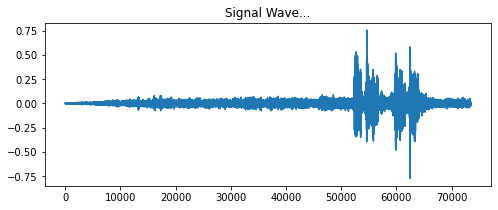

1.9829793e-05
mean power1.9829793e-05
deviation0.049678687
shape of data(441000,)
rate:44100
max = 0.7650542259216309 and min = -0.7709765434265137
first ten samples [0.00086457 0.00086457 0.00077811 0.00086457 0.00082134 0.00064842
 0.00056197 0.00047551 0.0003026  0.00021614]


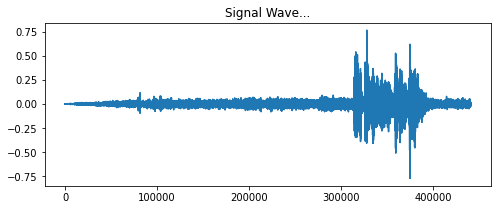

mean power3.34334e-05
deviation0.049744055
shape of data(73500,)
rate:7350.0
max = 0.7538148760795593 and min = -0.7669562697410583
first ten samples [ 8.6456578e-04  5.6196772e-04 -4.3228287e-05 -8.6456578e-04
 -1.7723598e-03 -2.4207842e-03 -2.1181861e-03 -1.3400769e-03
 -3.4582629e-04  1.2968486e-04]


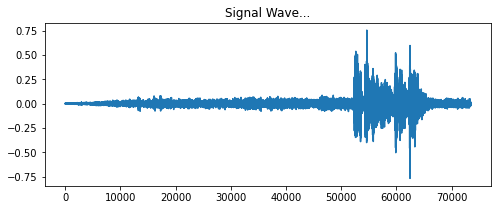

In [52]:
presentAliasingAudio(data_voice, rate_voice, 6)

# Music

mean power0.00010957031841662088
deviation0.22451111255570813
shape of data(22050,)
rate:7350.0
max = 1.0415738909473071 and min = -1.0958207049286135
first ten samples [-3.57201401e-06  1.28340733e-04 -2.28590602e-04  3.24255662e-04
 -5.21932015e-04  6.36722322e-04 -5.88568794e-04  3.51677068e-04
  1.66533448e-04 -1.36725754e-03]


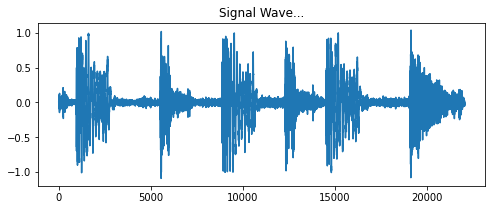

8.335681e-05
mean power8.335681e-05
deviation0.22924751
shape of data(132300,)
rate:44100
max = 0.999969482421875 and min = -1.0
first ten samples [-0.05458069 -0.04681396 -0.07824707 -0.1214447  -0.12158203 -0.08894348
 -0.05639648 -0.01808167  0.03968811  0.07492065]


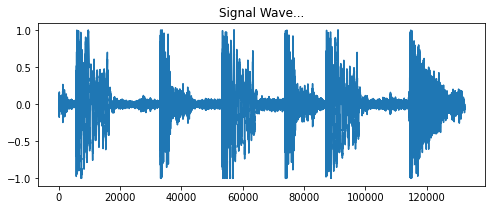

mean power9.604941e-05
deviation0.22960061
shape of data(22050,)
rate:7350.0
max = 0.999969482421875 and min = -1.0
first ten samples [-0.05458069 -0.05639648  0.08647156  0.08216858 -0.04270935 -0.06578064
  0.01533508  0.05766296  0.00541687 -0.02516174]


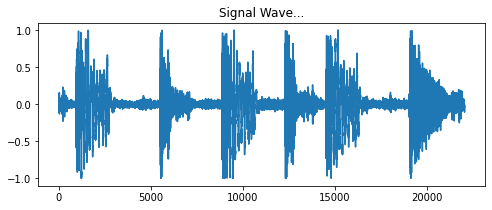

In [53]:
presentAliasingAudio(data_music, rate_music, 6)

# Chirp

0.0017638963583933547
mean power0.0017638963583933547
deviation0.7066624998339741


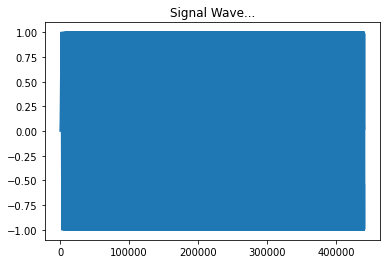

mean power0.001805475048011058
deviation0.7055058715078711


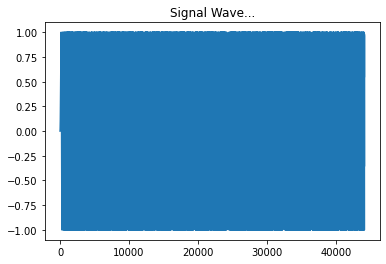

In [ ]:
Fs = 44100
t = np.arange(0, 10, 1/Fs)
f = 200
data_chirp = np.sin(2*np.pi*f*t*t)
rate_chirp = Fs
presentAliasingAudio(data_chirp, rate_chirp, 10)

In [ ]:
Fs = 5      # the sampling frequency
F_plot = 100  # the frequency used for plotting the time-continuous curves
T = 2       # the time-span we'll cover
t = np.arange(0, T, 1/Fs)  # the sample times
t_plot = np.arange(0, t.max(), 1/F_plot)  # time instants for plotting


def showAlias(f1):
    plt.gcf().clear()
    f2 = min(f1, Fs-f1)  # determine the alias frequency
    xt1 = lambda t: np.cos(2*np.pi*f1*t) # create both sine-functions
    xt2 = lambda t: np.cos(2*np.pi*f2*t)
    
    # plot the signals
    plt.subplot(121)
    plt.plot(t_plot, xt1(t_plot), 'b-', lw=2, label='input signal')
    plt.stem(t, xt1(t), label='sampled points')
    plt.plot(t_plot, xt2(t_plot), 'g-', label='after sampling')
    plt.ylim((-1.1, 1.5)); plt.grid(True)
    plt.legend(fontsize=8)
    plt.xlabel('$t$'); plt.ylabel('$x(t), x[n]$')
    
    # plot the spectrum of the signals
    t_freq = np.arange(0, 20*T, 1/F_plot) 
    x1 = xt1(t_freq)
    x2 = xt2(t_freq)
    X1 = np.fft.fftshift(np.fft.fft(x1, 8*len(x1))) / len(x1)
    X2 = np.fft.fftshift(np.fft.fft(x2, 8*len(x1))) / len(x2)
    f = np.linspace(-F_plot/2, F_plot/2, len(X1), endpoint=False)
    plt.subplot(122)
    plt.plot(f, abs(X1), lw=2, label='input')
    plt.plot(f, abs(X2), label='after sampling')
    plt.legend(loc='upper left', fontsize=8)
    plt.xlim((-Fs, Fs))
    plt.axvline(-Fs/2, color='k', ls='--', lw=2)
    plt.axvline(Fs/2, color='k', ls='--', lw=2)
    plt.ylim((-0.1, 1.1))
    plt.grid(True)
    plt.text(x=2.5, y=0.8, s='$f_{in}=%.2f$\n$f_{out}=%.2f$' % (f1, f2), bbox=dict(facecolor='white'))
    plt.xlabel('$f$'); plt.ylabel('$|X(f)|$')
    plt.show()

In [ ]:
plt.figure()
interact(showAlias, f1=(0,5., 0.01));

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=2.5, description='f1', max=5.0, step=0.01), Output()), _dom_classes=('…

In the left figure, the time-domain input signal (blue) with frequency $f_0$, the sampled points (blue dots) and the sine wave with the same sampling points but with frequency $0<f_1<F_s/2$ (green) are shown. In the right figure, the spectrum of both sine-waves is presented. As long as the input signal in blue is within $0<f_0<F_s/2$, the green curve is on top of the blue. But, as soon as $f_0>Fs/2$, the frequency of the green curve decreases, when the input frequency increases. **The input signal of too high frequency $f_0>F_s/2$ is mapped to a lower frequency $F_s-f_0$ in the output**. 

This is also exactly what we heard in the third sound example of aliasing, i.e. the chirp function.  As soon, as the frequency of the sine went above the Nyquist frequency, the aliasing kicks in and the actually played frequencie decreases. Let us repeat this here for convenience:

0.0017638963583933547
mean power0.0017638963583933547
deviation0.7066624998339741


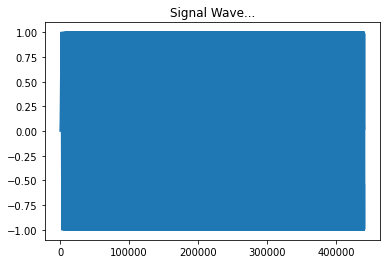

mean power0.001805475048011058
deviation0.7055058715078711


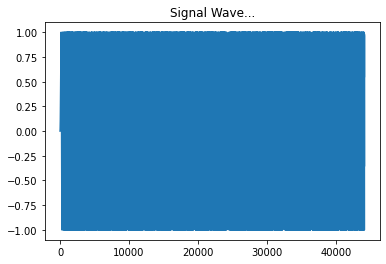

In [ ]:
presentAliasingAudio(data_chirp, rate_chirp, 10)

Now, with the designed anti-aliasing filter, we can go ahead and implement our downsampling with and without anti-aliasing filtering:

Finally, here's the code to load the presented audio pieces from the internet:

And eventually, the URLs and calls to actually load the audio from the WWW:

# Summary

> - Aliasing occurs during downsampling a digital or sampling an analog signal
> - The name *Aliasing* stems from the fact that several different frequencies on the original signal are mapped to the same sampled sequence, i.e. creating ambiguity in the sampled signal.
> - Aliasing can be mitigated by application of a low-pass filter before downsampling. The low-pass filter removes all frequencies above half the Nyquist-frequency and thus inhibits aliasing of high-frequencies into the lower frequencies. 
> - In audio, aliasing can have different sounds, depending on the originating signal. 